In [1]:
import matplotlib.pyplot as plt
import  numpy as np
import  pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import seaborn as sns
sns.set_theme(style="ticks")

### *0.1* LOAD DATA 

In [2]:
df_data= pd.read_csv(os.path.join('..','data', 'cs-training.csv'))
df_data.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## **DATA INFORMATION**

### 0.1 GENERAL INFORMATIONS

In [3]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### 0.2 FEATURE ENGINEERING

In [6]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)


In [7]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

### 0.3 SPLITTING THE DATA

In [8]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
X_resampled, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96215, 9) (24054, 9) (96215,) (24054,)


In [9]:
X_train.columns

Index(['balance_divided_creditlimit', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'number_times_latepay60-89',
       'NumberOfDependents'],
      dtype='object')

In [7]:
###############################################################################
lista= ['balance_divided_creditlimit', 'DebtRatio', 'MonthlyIncome']
X_train['NumberRealEstateLoansOrLines'].value_counts().sort_index()

X_train['balance_divided_creditlimit'].value_counts().sort_index()[30:]


C:\Users\Erika\AppData\Local\Temp\ipykernel_11272\2156794175.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  X_train['balance_divided_creditlimit'].value_counts().sort_index()[30:]


balance_divided_creditlimit
42.000000       1
50.000000       1
61.000000       1
73.846154       1
79.000000       1
               ..
17441.000000    1
18300.000000    1
20514.000000    1
29110.000000    1
50708.000000    1
Name: count, Length: 130, dtype: int64

# ANNOTATION
    balance_divided_creditlimit= as near to 0, the client doesn't have much LOAN
    DebtRatio = as near to 0, the client dont have high monthly cost

In [80]:
X_train.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
25057,0.000000,32,0.058840,3500.0,2,0,0,0,2.0
51785,0.514081,44,0.209755,6621.0,8,0,1,0,2.0
121996,0.791565,39,0.138285,5654.0,9,0,0,0,0.0
52556,0.013772,73,0.005531,4700.0,7,0,0,0,0.0
105023,0.006397,63,0.062644,3894.0,9,0,0,0,0.0


### 0.4 Balancing the targets (discussed in section 1.0)

In [209]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_test_rsld, y_test_rsld= ros.fit_resample(X_test, y_test)
y_counts= y_resampled.value_counts()
resampledDf= pd.DataFrame({'CLASS 0': y_counts[0], 'CLASS 1': y_counts[1]}, index=['QUANTITY EACH CLASS'])
X_resampled.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.000000,32,0.058840,3500.0,2,0,0,0,2.0
1,0.514081,44,0.209755,6621.0,8,0,1,0,2.0
2,0.791565,39,0.138285,5654.0,9,0,0,0,0.0
3,0.013772,73,0.005531,4700.0,7,0,0,0,0.0
4,0.006397,63,0.062644,3894.0,9,0,0,0,0.0


## 0.5  EDA - Exploratory Data Analyses

In [193]:

def debtDivided(value):
    if value >=0 and value<25:
        return 0   
    if  value>= 25.0 and value<50.0:
        return 1
    elif value >= 50.0 and value < 100.0:
        return 2
    elif value >=100 and value < 150.0:
        return 3
    elif value>=150 and value <200:
        return  4
    elif value>=200 and value <400:
        return 5
    else:
        return 6
    
particioned_data_2= X_resampled.iloc[:50000,2].apply(debtDivided)
particioned_data_2

particioned_data_2= pd.DataFrame(particioned_data_2)
particioned_data_2['age']= X_resampled.iloc[:50000, 1]
print(particioned_data_2['DebtRatio'].value_counts())
particioned_data_2['age'].value_counts()


DebtRatio
0    49208
6      568
5       79
1       63
2       41
3       23
4       18
Name: count, dtype: int64


age
49     1354
48     1343
46     1341
50     1299
54     1279
       ... 
96        4
99        1
102       1
101       1
0         1
Name: count, Length: 81, dtype: int64

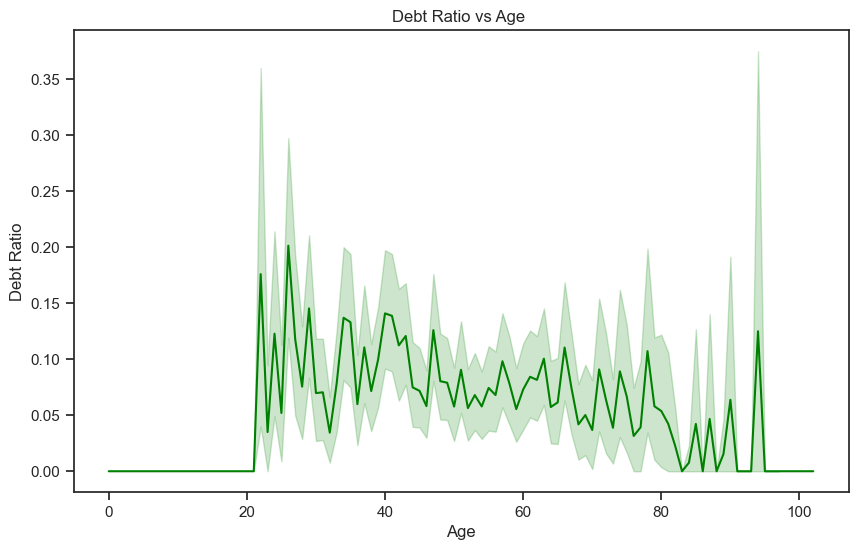

In [194]:


# Gráfico de linha (line plot) para relacionar DebtRatio com idade
plt.figure(figsize=(10, 6))
sns.lineplot(data=particioned_data_2, x='age', y='DebtRatio', color='green')

# Adicionar rótulos e título
plt.xlabel('Age')
plt.ylabel('Debt Ratio')
plt.title('Debt Ratio vs Age ')

# Mostrar o gráfico
plt.show()

<Axes: xlabel='number_dependents', ylabel='Pastdue'>

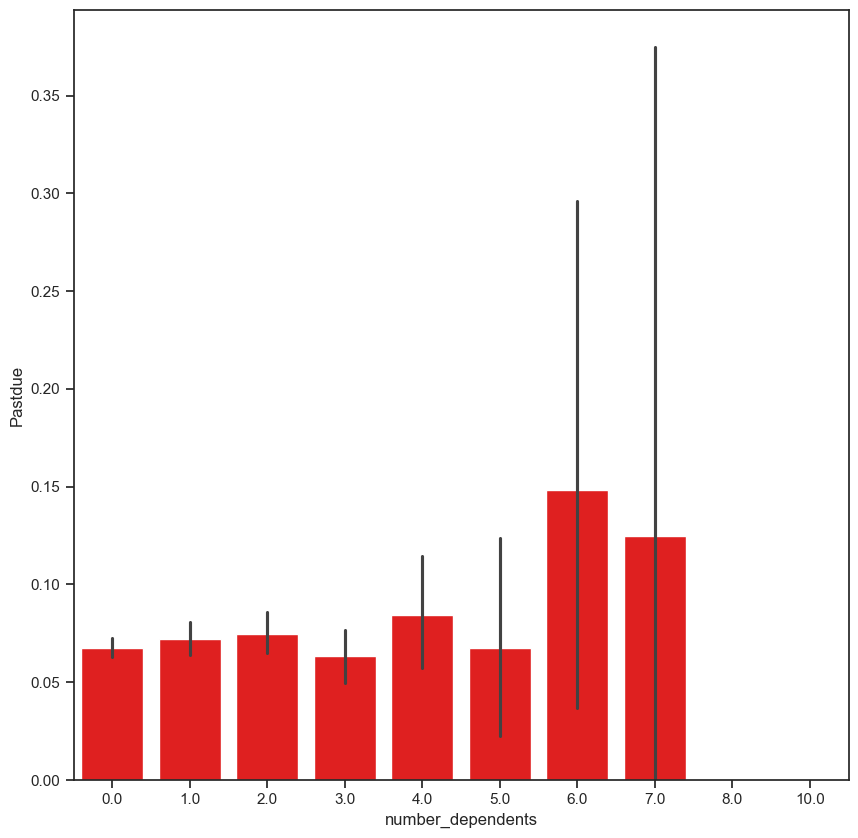

In [196]:
duedependents= pd.DataFrame()
duedependents['Pastdue']= y_train.iloc[:50000]
duedependents['number_dependents']= X_resampled.iloc[:50000, 8]
plt.figure(figsize=(10,10))
sns.barplot(duedependents, x='number_dependents', y='Pastdue', color='red')


<Axes: xlabel='pastdue', ylabel='balance_creditlimit'>

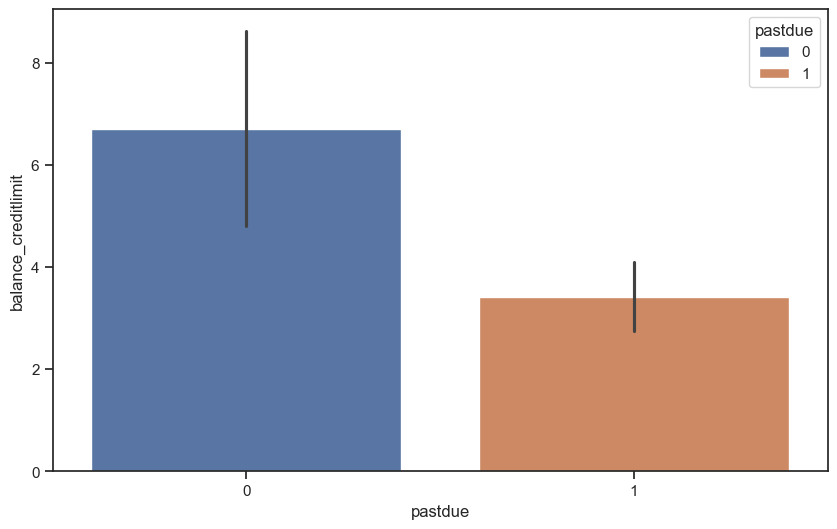

In [226]:
balancedue= pd.DataFrame()
balancedue['balance_creditlimit'] = X_resampled.iloc[:, 0]
balancedue['pastdue']= y_resampled.iloc[:]
balancedue=balancedue.sort_index()
plt.figure(figsize=(10,6))
sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue')

In [220]:
balancedue['pastdue'].value_counts()


pastdue
0    89483
1    89483
Name: count, dtype: int64

### 1.0 DATA PRE-PROCESSING

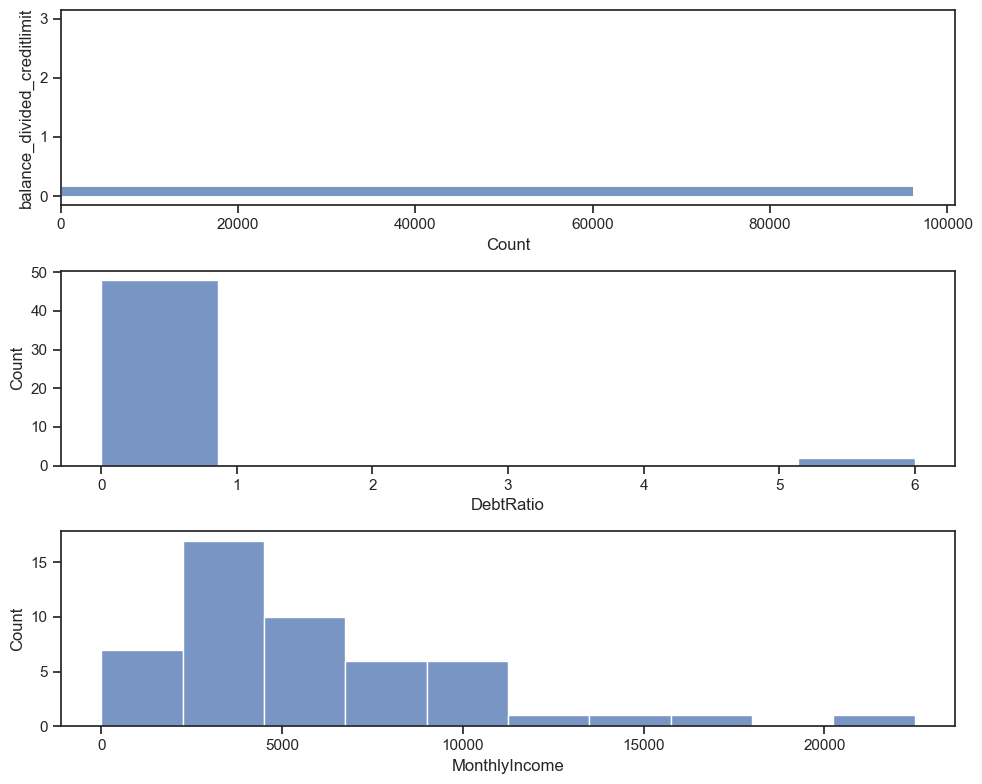

In [8]:
def debtDivided(value):
    if value >=0 and value<25:
        return 0
    elif value>= 25.0 and value<50.0:
        return 1
    elif value >= 50.0 and value < 100.0:
        return 2
    elif value >=100 and value < 150.0:
        return 3
    elif value>=150 and value <200:
        return  4
    elif value>=200 and value <400:
        return 5
    else:
        return 6
# .apply( lambda x: 0 if x>=0 and x<=25 else '<1' if x == '> 2 Years' else '>2' )
particioned_data_0= X_resampled.iloc[:, 0].apply(lambda x: 0 if 0 <= x <25 else 1 if 25 <= x <100 else 2 if 100 <= x <200 else 3)
particioned_data_0= particioned_data_0.reset_index(name='balance_divided_creditlimit')
particioned_data_2= X_train.iloc[:50, 2].apply(debtDivided)
particioned_data_3= X_train.iloc[:50, 3]



fig, axs = plt.subplots(3, 1, figsize=(10, 8)) # 1 linha, 2 colunas, gráfico 1
sns.histplot(particioned_data_0, ax=axs[0],  y='balance_divided_creditlimit')

sns.histplot(particioned_data_2, ax=axs[1])
sns.histplot(particioned_data_3, ax=axs[2])


plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


#### 1.1 INBALANCED TARGETS 

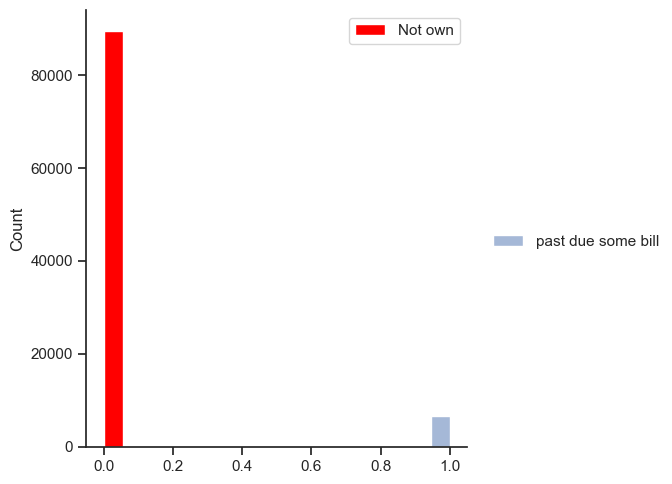

In [149]:
parta_data= pd.DataFrame({'past due some bill': y_train.values})
g= sns.displot(parta_data)
bars = g.ax.patches
bars[0].set_facecolor('red')
plt.legend(['Not own'])
plt.show()


>THE GRAPH ABOVE SHOWS OUR TARGET VARIABLE Y AND EACH QUANTITY.                                                                              
> WE CAN CLAIRLY SEE THAT CLIENTS THAT DON'T OWE ANYTHING (CLASS 0) HAS OVER 80.000 TRAINING EXAMPLES WHILE THE CLASS 1 HAS LESS THAN 20.000 TRAINING EXAMPLES
AS OUR GOAL IS TO PREDICT IF THE CLIENT OWES MONEY AND STILL WANTS TO RECEIVE A LOAN, WE NEED TO BALANCE THE DATASET

### Training a model without using unbalanced dataset

In [25]:
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=50).fit( X_train, y_train )
yhat_knn = knn.predict_proba( X_test )
if yhat_knn[83,0] > yhat_knn[83,1]:
    pred_ex= 0
else:
    pre_ex=1
examplePredict_0= pd.DataFrame({'Predicted class': [pred_ex, f'{yhat_knn[9,0]*100}%'], 'Actual class': [y_test.iloc[9], ""]}, index=['Measurement', 'Confidence'])
examplePredict_0.head()

,Predicted class,Actual class
Measurement,0,1
Confidence,98.0%,


<Axes: xlabel='number_dependents', ylabel='Pastdue'>

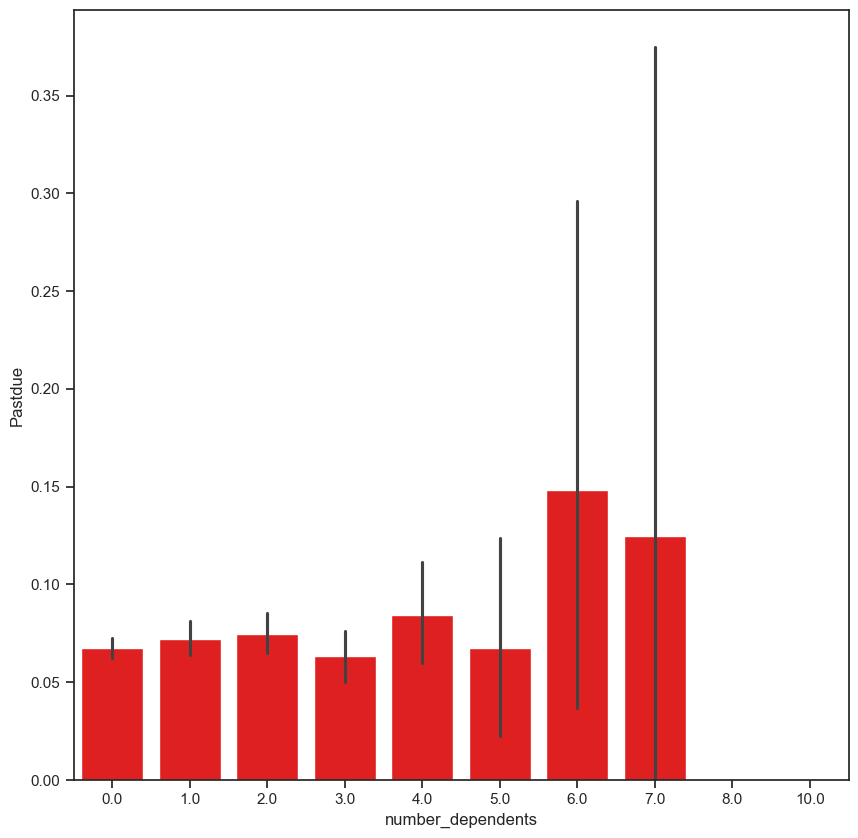

In [189]:
incomeage= pd.DataFrame()
incomeage['Pastdue']= y_train[:50000]
incomeage['number_dependents']= exsa.iloc[:50000, 8]
plt.figure(figsize=(10,10))
sns.barplot(incomeage, x='number_dependents', y='Pastdue', color='red')


,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.000000,32,0.058840,3500.0,2,0,0,0,2.0
1,0.514081,44,0.209755,6621.0,8,0,1,0,2.0
2,0.791565,39,0.138285,5654.0,9,0,0,0,0.0
3,0.013772,73,0.005531,4700.0,7,0,0,0,0.0
4,0.006397,63,0.062644,3894.0,9,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
178961,0.572218,51,0.658987,4166.0,6,0,1,0,2.0
178962,0.208122,36,0.442980,2200.0,5,1,0,1,2.0
178963,0.970297,44,0.559220,2000.0,11,0,1,0,3.0
178964,0.552223,88,2.190669,3450.0,4,3,1,0,0.0


### Normalizing 

In [58]:
from sklearn.preprocessing import normalize
X_resampled= normalize(X_resampled)
X_test_rsld = normalize(X_test_rsld)
X_resampled.shape


(178966, 9)

In [14]:
def cont(value):
    if value <=50000 and value>=3000:
        return value
ab= X_train['MonthlyIncome'].apply(cont).value_counts()
ab= pd.DataFrame(ab)
ab['Monthly_income']= ab.index




(178966, 9)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors       import KNeighborsClassifier

knn_new = KNeighborsClassifier(n_neighbors=50).fit( X_resampled, y_resampled )
yhat_knn_new = knn_new.predict_proba( X_test_rsld )

# acc= accuracy_score(y)
# acc= accuracy_score(y)
print(yhat_knn_new.shape)
#yhat_knn_new = knn.predict_proba( X_test_rsld )


(44858, 2)


In [60]:
def app(value):
    if value.argmax() == 0:
        return 0
    elif value.argmax() == 1:
        return 1
listest= []
for i in yhat_knn_new:

    listest.append(app(i))

acc_teste= np.array(listest)

array([0, 1, 0, ..., 1, 1, 0])

In [61]:
print(y_test_rsld.shape)
from sklearn.metrics import accuracy_score


accuracy_score(y_test_rsld, acc_teste)

(44858,)


0.6631593026884837